<center>
<h1>Final Project</h1><br>
<h2>ENGL64.05 / QSS 30.16 22F</h2>
</center>

#### Group Members:
---

In [37]:
import os
import csv
import numpy as np
import sklearn
from operator import itemgetter

In [38]:
## Section 1: Vectorization

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(input='filename', 
                             stop_words= None,
                             strip_accents='unicode')

In [40]:
## Section 2: Vectorization for the Whole Dataset

In [41]:
import glob as glob
book_texts = glob.glob("PRES ADD/*")

In [42]:
import os
short_names = [os.path.basename(f) for f in book_texts]

In [73]:
labels = [f[:6] for f in short_names]
print(labels)

['1933FD', '1913Wi', '1801Je', '1825Qu', '2001WB', '1845Po', '1981Re', '2017Tr', '1905TR', '1893Cl', '1829Ja', '1897Mc', '1961Ke', '1869Gr', '1853Pi', '1849Ta', '1925Co', '1953Ei', '1877Ha', '1889Ha', '1921Ha', '1857Bu', '1837va', '2021Bi', '1929Ho', '1989HW', '1909Ta', '1969Ni', '1885Cl', '1841He', '1861Li', '2009Ob', '1949Tr', '1993Cl', '1881Ga', '1817Mo', '1977Ca', '1965Jo', '1797Ad', '1809Ma', '1789Ge']


In [74]:
dtm = vectorizer.fit_transform(book_texts)

dc, vc = dtm.shape
print("document count:",dc,"vocabulary count:",vc)

document count: 41 vocabulary count: 8247


In [75]:
from sklearn.linear_model import SGDClassifier

# remodel
vec_nostop = CountVectorizer(input = 'filename', 
                             stop_words = 'english',
                             strip_accents= 'unicode')
dtm_classify = vec_nostop.fit_transform(book_texts)




party_labels = [l[-6:-4] for l in labels]

# train the model using SVM
clf = SGDClassifier(tol=None,max_iter=1000).fit(dtm_classify, party_labels)

feat_number = 40
feature_names = vec_nostop.get_feature_names_out()

for i, class_label in enumerate(clf.classes_):
    terms = np.argsort(clf.coef_[i])[::-1][:40]
    print("Party %s: %s" % (class_label,
                      ", ".join(feature_names[j] for j in terms)))

Party 17: nations, love, good, mind, honor, public, happiness, present, order, resolution, choice, virtuous, pleasing, knowledge, private, people, little, veneration, integrity, humble, particular, expedient, gratitude, deliberations, legislatures, nation, measures, justice, virtue, representatives, recommendations, voice, form, support, sight, acknowledge, habitual, corruption, add, providential
Party 18: institutions, public, states, constitution, power, interests, laws, people, trust, united, shall, far, debt, best, blessings, union, countrymen, prosperity, revenue, confidence, republic, rights, country, ability, opinions, experience, circumstances, civil, view, desire, value, basis, service, partisan, fathers, patriotic, authority, settled, citizenship, condition
Party 19: world, change, life, freedom, business, means, man, work, need, hope, race, new, time, economic, help, make, conditions, use, hold, men, peace, ought, cost, industrial, possible, force, proper, let, interstate, f

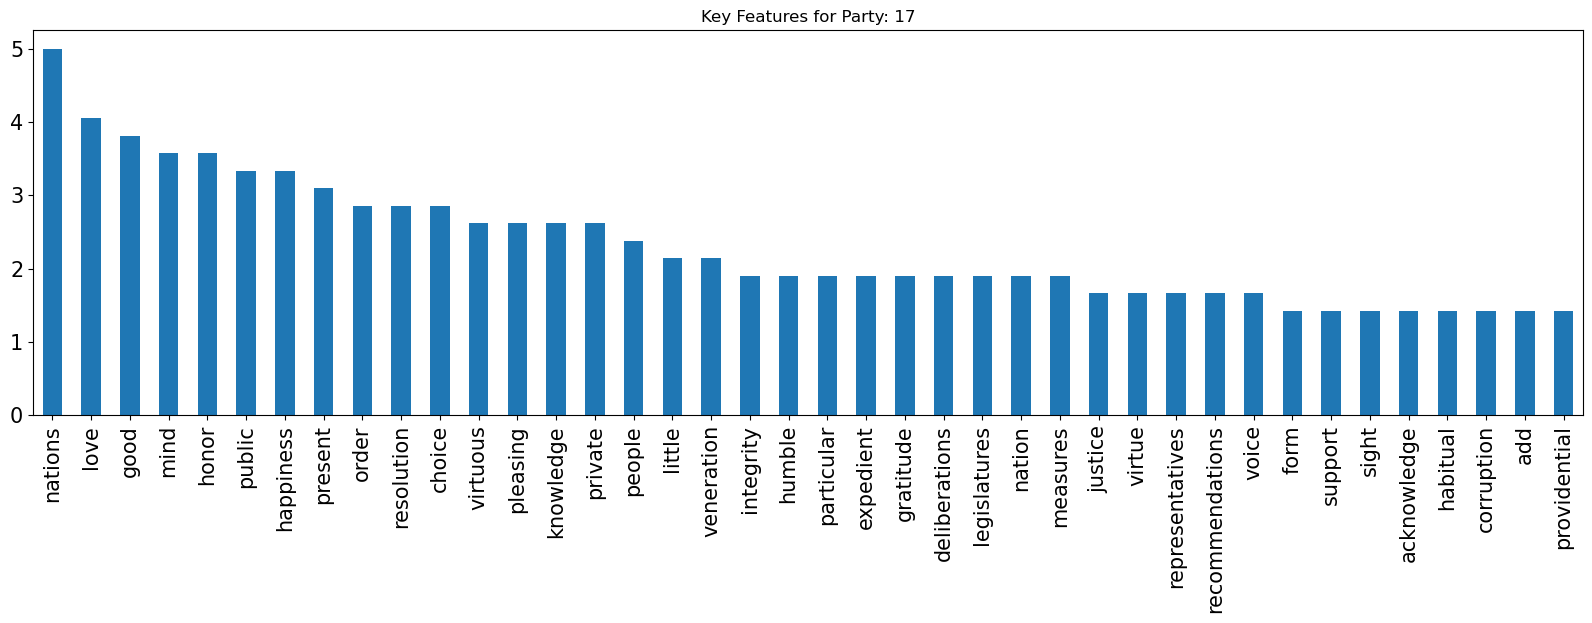

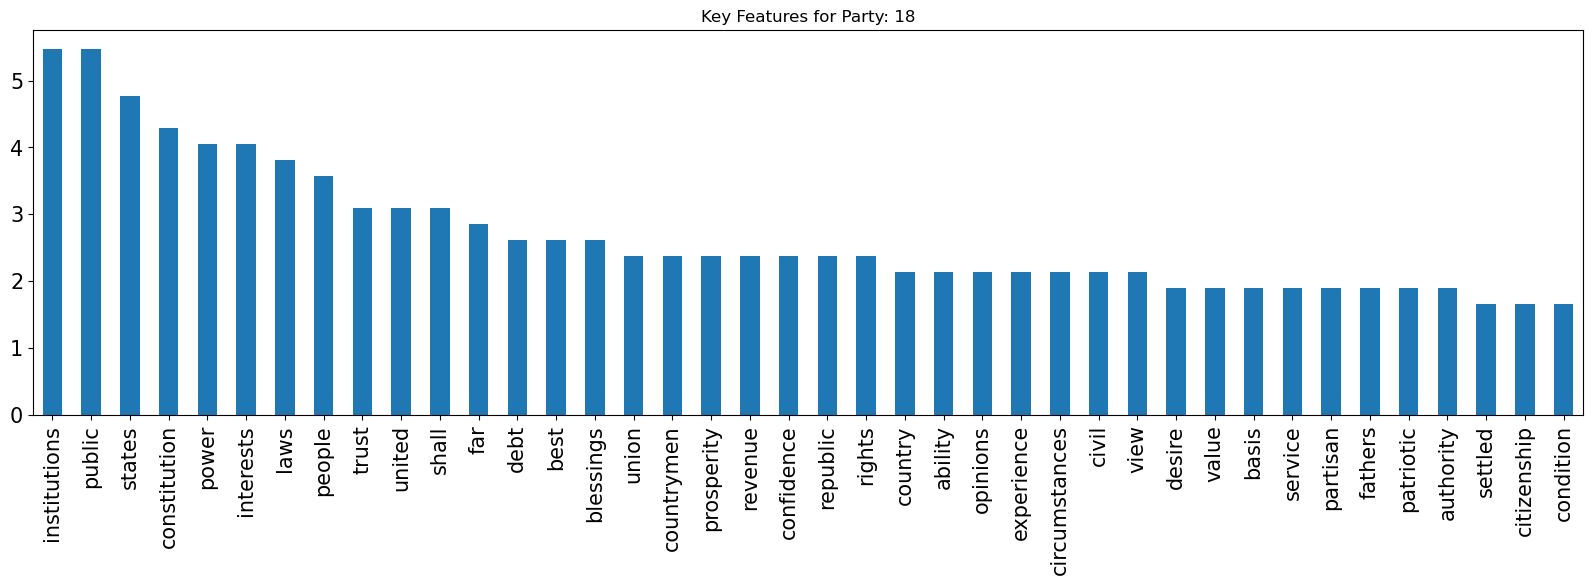

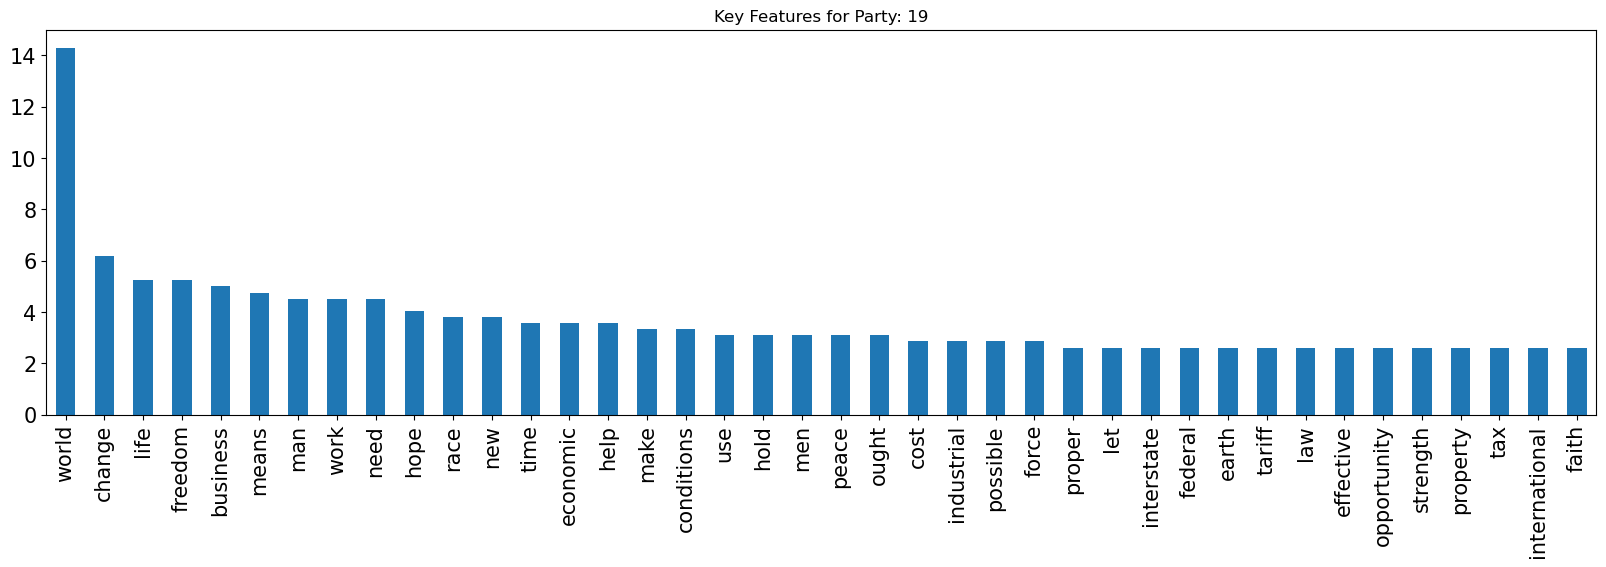

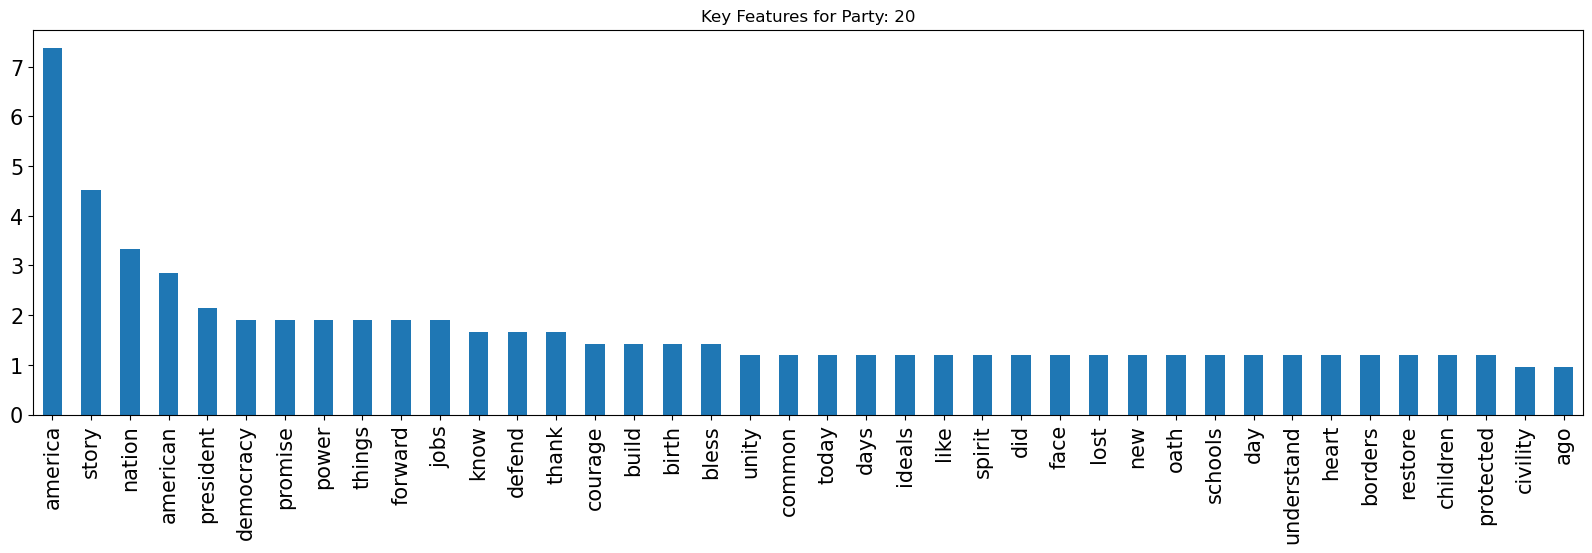

In [119]:
import pandas as pd

for i, class_label in enumerate(clf.classes_):
    df = pd.DataFrame([clf.coef_[i][idx] for idx in np.argsort(clf.coef_[i])[::-1][:40]],
                  index = [vec_nostop.get_feature_names_out()[idx] for idx in np.argsort(clf.coef_[i])[::-1][:40]])
    df.plot(figsize=(20, 5),kind='bar',title='Key Features for Party: ' + class_label,legend=False, fontsize = 15)

In [77]:
# create dictionary mapping vocabulary index to word
idx2voc = dict([(v, k) for k, v in vectorizer.vocabulary_.items()])

In [78]:
## Section 2: Euclidean Similarity [Simple]

In [79]:
from sklearn.metrics import euclidean_distances
dist = euclidean_distances(dtm[0],dtm[1])[0][0]
print(short_names[0],"->",short_names[1],"=",dist)

1933FDR_D.txt -> 1913Wilson_D.txt = 81.1664955508121


In [80]:
# We can easily create a distance matrix for all our files easily enough
dist_matrix = euclidean_distances(dtm)

In [81]:
# NumPy's argsort can sort distances from a selected (our first text, in this example) row in the matrix:
#for i in np.argsort(dist_matrix[0]):
 #   print(short_names[i],dist_matrix[0][i])

In [82]:
## Section 3: Plotting Data with MDS [Simple]

In [111]:
import glob as glob
source_texts = glob.glob("PRES ADD/*")

In [112]:
labels = [os.path.basename(f) for f in source_texts]
print(labels)

['1933FDR_D.txt', '1913Wilson_D.txt', '1801Jefferson_B.txt', '1825QuincyAdams_W.txt', '2001WBush_R.txt', '1845Polk_D.txt', '1981Reagen_R.txt', '2017Trump_R.txt', '1905TRoosevelt_R.txt', '1893Cleveland2_D.txt', '1829Jackson_D.txt', '1897Mckinley_R.txt', '1961Kennedy_D.txt', '1869Grant_R.txt', '1853Pierce_D.txt', '1849Taylor_W.txt', '1925Coolidge_R.txt', '1953Eisenhower_R.txt', '1877Hayes_R.txt', '1889Harrison_R.txt', '1921Harding_R.txt', '1857Buchanan_D.txt', '1837vanBuren_D.txt', '2021Biden_D.txt', '1929Hoover_R.txt', '1989HWBush_R.txt', '1909Taft_R.txt', '1969Nixon_R.txt', '1885Cleveland1_D.txt', '1861Lincoln_N.txt', '1841HenryHarrison_W.txt', '2009Obama_D.txt', '1949Truman_D.txt', '1993Clinton_D.txt', '1881Garfield_R.txt', '1817Monroe_B.txt', '1977Carter_D.txt', '1965Johnson_D.txt', '1797Adams_F.txt', '1809Madison_B.txt', '1789GeorgeWashington.txt']


In [113]:
new_label = []
for x in labels:
    d = x[:-6]
    b = d[4:]
    new_label.append(b)
print(new_label)

['FDR', 'Wilson', 'Jefferson', 'QuincyAdams', 'WBush', 'Polk', 'Reagen', 'Trump', 'TRoosevelt', 'Cleveland2', 'Jackson', 'Mckinley', 'Kennedy', 'Grant', 'Pierce', 'Taylor', 'Coolidge', 'Eisenhower', 'Hayes', 'Harrison', 'Harding', 'Buchanan', 'vanBuren', 'Biden', 'Hoover', 'HWBush', 'Taft', 'Nixon', 'Cleveland1', 'Lincoln', 'HenryHarrison', 'Obama', 'Truman', 'Clinton', 'Garfield', 'Monroe', 'Carter', 'Johnson', 'Adams', 'Madison', 'GeorgeWashingt']


In [114]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_dist_matrix = 1 - cosine_similarity(dtm)

In [115]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(cosine_dist_matrix)

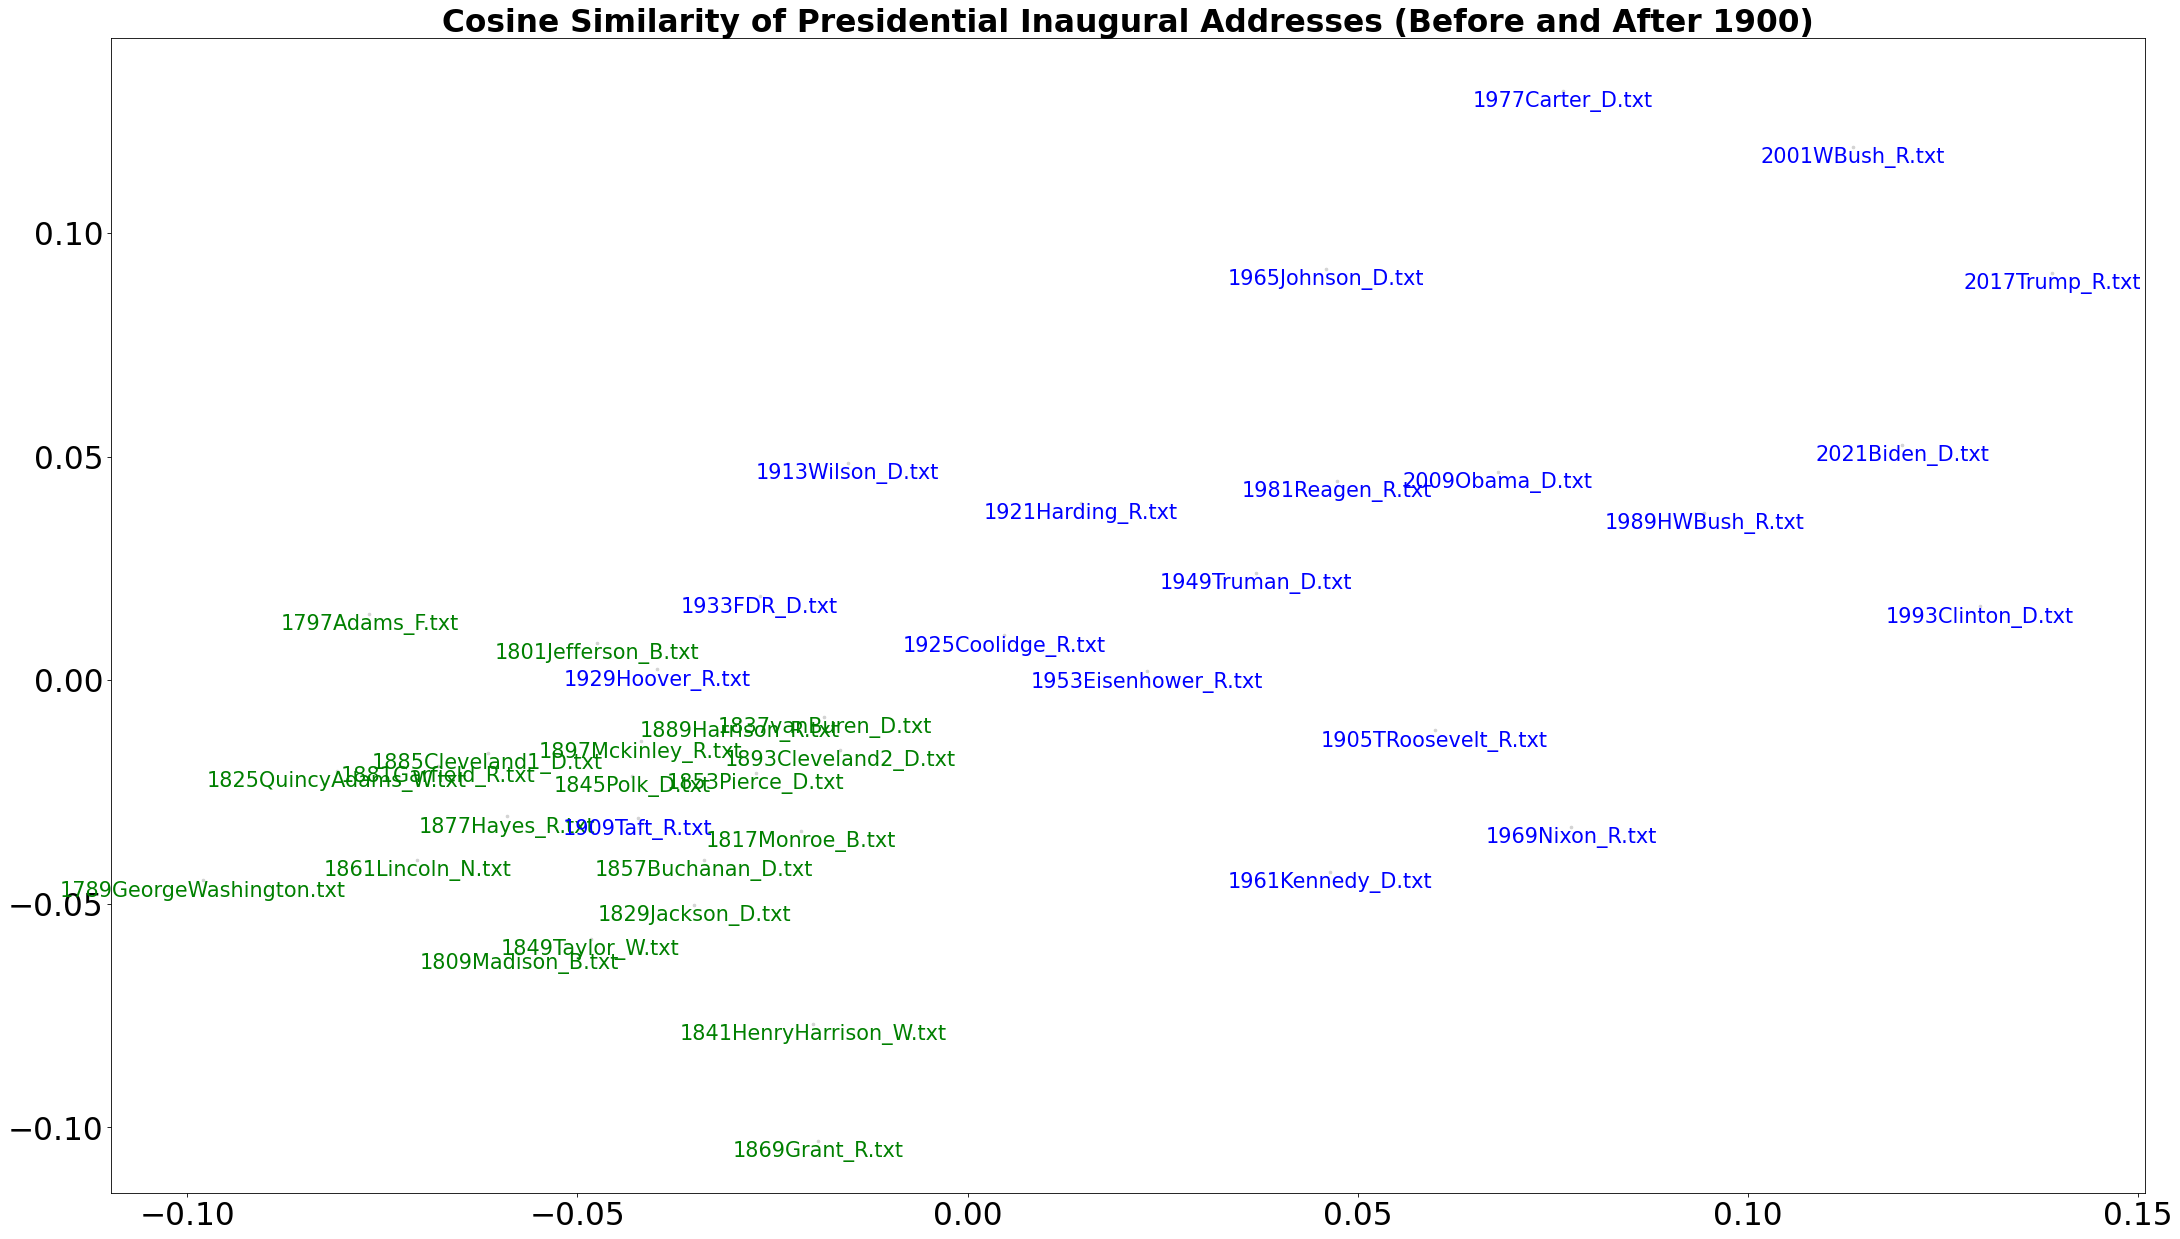

In [116]:
# Visualize the results of MDS
# 
# NOTE: you might need to click on the image to expand it enough to read it. 
# 

import matplotlib.pyplot as plt
xs, ys = pos[:, 0], pos[:, 1]
fig = plt.figure(figsize=(35, 20), dpi=75)

# this will loop through four different lists simultaneously
for x, y, label in zip(xs, ys, labels):

    # plot the point itsself
    plt.scatter(x, y, c='lightgrey',s=6)
    
 #   if label[-5] == "F":
    if int(label[0:4]) < 1900:
        plt.text(x, y, label, fontsize = 20, c="green", ha='center', va='top')
    else:
        plt.text(x, y, label, fontsize = 20, c="blue", ha='center', va='top')
#    if label[-5] == "B":
    #    plt.text(x, y, label, fontsize = 20, c="orange", ha='center', va='top')
 #   if label[-5] == "W":
      #plt.text(x, y, label, fontsize = 20, c="green", ha='center', va='top')
#    if label[-5] == "D":
      #  plt.text(x, y, label, fontsize = 20, c="blue", ha='center', va='top')
#    if label[-5] == "R":
       # plt.text(x, y, label, fontsize = 20, c="red", ha='center', va='top')
#    if label[-5] == "_":
       # plt.text(x, y, label, fontsize = 20, c="red", ha='center', va='top')
    
    # This line will annotate the point by displaying 
    # the label in blue


    plt.axis('on')
plt.title('Cosine Similarity of Presidential Inaugural Addresses (Before and After 1900)', fontsize = 30, fontweight = "bold")
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

In [120]:
#Section 4 Bing Sentiment

In [137]:
# import required libraries
import statistics
from glob import glob
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize

In [138]:
def labMT_sentiment_means(text):
    labMT_sentiment = dict()
    with open('shared/ENGL64.05-22F/lexicons/word_sentiment_scores.csv', encoding = 'utf-8') as f:
        reader = csv.reader(f, delimiter = ',')
        for row in reader:
            labMT_sentiment[row[0]] = float(row[1])
        
    # determine if we need to tokenize or not
    if type(text) == str:
        # tokenize string
        text = word_tokenize(text)
    
    sentiment_values = []
    for word in text:
        if word in labMT_sentiment:
            value = labMT_sentiment[word]
            sentiment_values.append(value)
        else:
            sentiment_values.append(0)
            
    mean_sentiment = np.mean(sentiment_values)
    return mean_sentiment


In [139]:
# now evaluate a sample product/film/book review that you found on the Web
import glob as glob
review = glob.glob('PRES ADD/*')
sentiment_data = list()
for page in review:
    raw_text = open(page).read()
    tokens = word_tokenize(raw_text)
    sentiment_data.append(labMT_sentiment_means(tokens))
print(sentiment_data)

[4.233309073265405, 4.252061473237943, 4.200904811715481, 4.172519059720457, 4.093401210787011, 4.0993533487297915, 3.95767684021544, 3.981758045292014, 4.4020389249304905, 4.12703564727955, 4.221339950372209, 4.144381455129676, 4.225123859191656, 4.241520325203251, 4.168702687877126, 4.157385398981324, 4.287301801801802, 4.182648020341445, 4.291357750647429, 4.213661375661376, 3.9426164970540976, 4.1754539559014265, 4.170158691993268, 3.8131516352824577, 4.177760765550239, 4.072324888226527, 4.3008021298522845, 4.2856775797762126, 4.212074848651624, 3.957418552598856, 4.236574337639588, 4.146430163447251, 4.368136472466081, 4.044879649890591, 4.141133603238867, 4.2099239337136645, 4.237621818181818, 4.064554513481829, 4.186730023273856, 4.320483359746434, 4.17959687906372]


In [140]:
year_list = list()
for x in review:
    text = x[9:13]
    number = int(text)
    year_list.append(number)

year_list.sort()
print(year_list)

[1789, 1797, 1801, 1809, 1817, 1825, 1829, 1837, 1841, 1845, 1849, 1853, 1857, 1861, 1869, 1877, 1881, 1885, 1889, 1893, 1897, 1905, 1909, 1913, 1921, 1925, 1929, 1933, 1949, 1953, 1961, 1965, 1969, 1977, 1981, 1989, 1993, 2001, 2009, 2017, 2021]


In [141]:
def rescale(values):
    scaled = 2 * (values - min(values))/( max(values) - min(values)) -1
    return(scaled)

# we can convert our list to a numpy array and then perform a vector operation
# on all the data to scale it.
data = np.asarray(sentiment_data)

scaled = rescale(data)


Text(0, 0.5, 'Mean Sentiment')

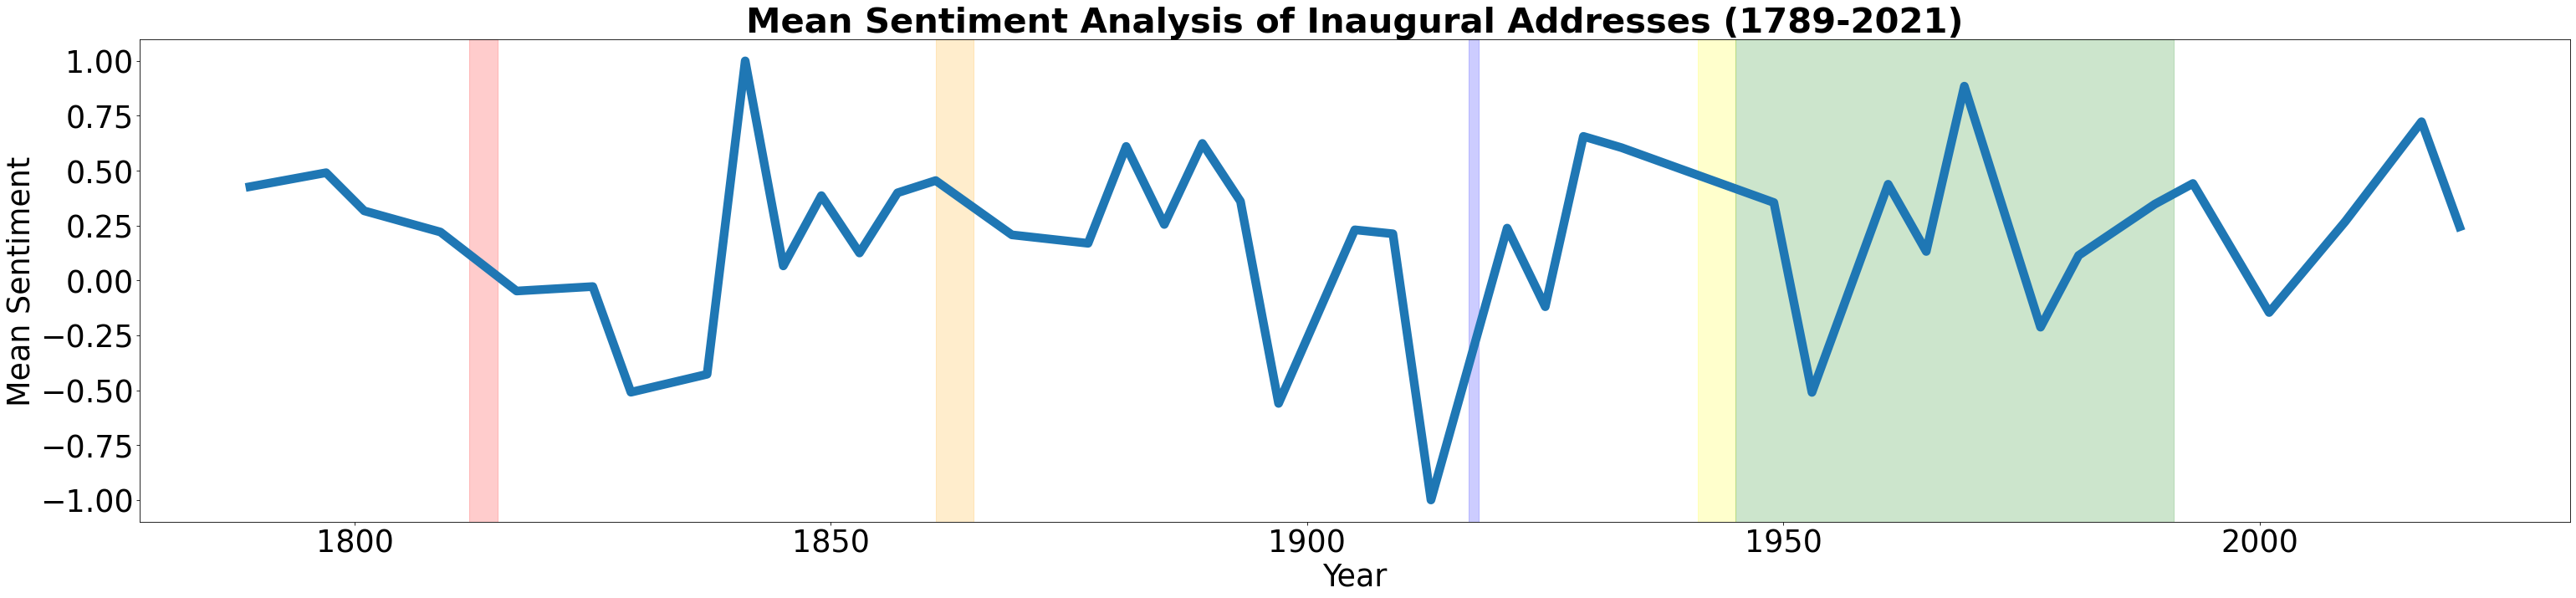

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 30
fig = plt.figure(figsize=(50, 10), dpi=75)
x, y = year_list, scaled

plt.plot(x, y, label = "Sentiment", linewidth = 10)
plt.xticks(fontsize = n+5)
plt.yticks(fontsize = n+5)
plt.axvspan(1812, 1815, color='red', alpha=0.2)
plt.axvspan(1861, 1865, color='orange', alpha=0.2)
plt.axvspan(1917, 1918, color='blue', alpha=0.2)
plt.axvspan(1941, 1945, color='yellow', alpha=0.2)
plt.axvspan(1945, 1991, color='green', alpha=0.2)
firstline.set_color('black')
secondline.set_color('black')
plt.title("Mean Sentiment Analysis of Inaugural Addresses (1789-2021)", fontsize = n+10, fontweight = 'bold')
plt.xlabel("Year", fontsize = n+5)
plt.ylabel("Mean Sentiment", fontsize = n+5)

In [143]:
# import required libraries
import statistics
from glob import glob
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize

In [128]:
def labMT_sentiment_means(text):
    labMT_sentiment = dict()
    with open('shared/ENGL64.05-22F/lexicons/word_sentiment_scores.csv', encoding = 'utf-8') as f:
        reader = csv.reader(f, delimiter = ',')
        for row in reader:
            labMT_sentiment[row[0]] = float(row[1])
        
    # determine if we need to tokenize or not
    if type(text) == str:
        # tokenize string
        text = word_tokenize(text)
    
    sentiment_values = []
    for word in text:
        if word in labMT_sentiment:
            value = labMT_sentiment[word]
            sentiment_values.append(value)
        else:
            sentiment_values.append(0)
            
    mean_sentiment = np.mean(sentiment_values)
    return mean_sentiment


In [129]:
# now evaluate a sample product/film/book review that you found on the Web
import glob as glob
review = glob.glob('Inaugurational Addresses/*')
sentiment_data = list()
for page in review:
    raw_text = open(page).read()
    tokens = word_tokenize(raw_text)
    sentiment_data.append(labMT_sentiment_means(tokens))
print(sentiment_data)

[4.2856775797762126, 3.8131516352824577, 3.95767684021544, 4.146430163447251, 4.044879649890591, 4.368136472466081, 4.237621818181818, 4.064554513481829, 4.093401210787011, 4.072324888226527, 4.225123859191656, 3.981758045292014, 4.182648020341445]


In [130]:
year_list = list()
for x in review:
    text = x[25:29]
    number = int(text)
    year_list.append(number)

year_list.sort()
print(year_list)

[1949, 1953, 1961, 1965, 1969, 1977, 1981, 1989, 1993, 2001, 2009, 2017, 2021]


In [131]:
UE_rates = [5.9, 2.9, 6.7, 4.5, 3.5, 7.1, 7.6, 5.3, 6.9, 4.7, 9.3, 4.4, 5.3]

In [132]:
def rescale(values):
    scaled = 2 * (values - min(values))/( max(values) - min(values)) -1
    return(scaled)

# we can convert our list to a numpy array and then perform a vector operation
# on all the data to scale it.
data = np.asarray(sentiment_data)

scaled = rescale(data)
data2 = np.asarray(UE_rates)
scaled2 = rescale(data2)

Text(0, 0.5, 'Mean Sentiment')

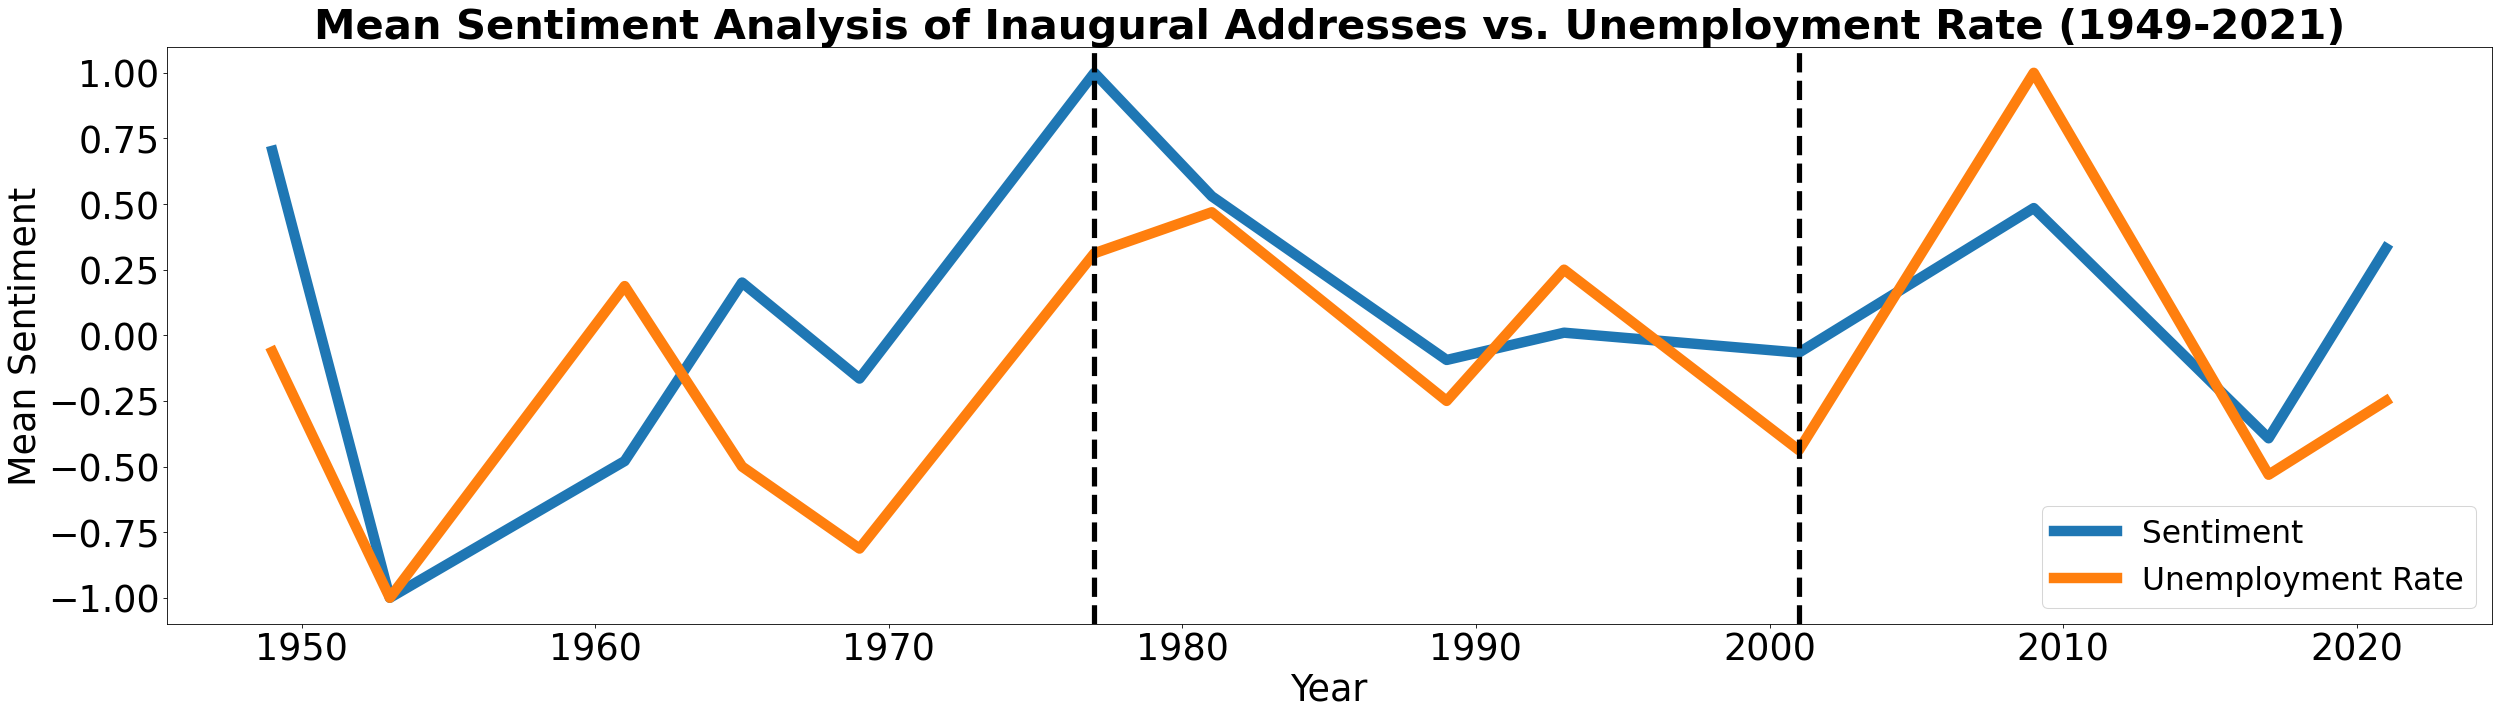

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 30
fig = plt.figure(figsize=(40, 10), dpi=75)
x, y = year_list, scaled
plt.plot(x, y, label = "Sentiment", linewidth = 10)
ax, ay = year_list, scaled2
plt.plot(ax, ay, label = "Unemployment Rate", linewidth = 10)
plt.legend(loc="lower right", fontsize = n)
plt.xticks(fontsize = n+5)
plt.yticks(fontsize = n+5)
firstline = plt.axvline(x = 1977, linewidth = 5, linestyle = 'dashed', label = 'axvline - full height')
secondline = plt.axvline(x = 2001, linewidth = 5, linestyle = 'dashed', label = 'axvline - full height')
firstline.set_color('black')
secondline.set_color('black')
plt.title("Mean Sentiment Analysis of Inaugural Addresses vs. Unemployment Rate (1949-2021)", fontsize = n+10, fontweight = 'bold')
plt.xlabel("Year", fontsize = n+5)
plt.ylabel("Mean Sentiment", fontsize = n+5)

In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import numpy as np

import nltk
from glob import glob
import string

In [ ]:
def cosine_finder(filename):
    import glob as glob
    english_sw = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
    punc_list = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    collection1 = glob.glob(filename)
    
    
    for x in collection1:
        collection = x
    sentences = list()
    
    text = open(collection).read()
    text_l = text.lower()
    # you might want to do some preprocess of the data
    tokens = nltk.word_tokenize(text_l)
    sentences.append(tokens)
    
    for word in english_sw:
        for x in sentences:
            for token in x:
                if token == word:
                    x.remove(token)
                if token == '--':
                    x.remove(token)
                if token == "''":
                    x.remove(token)
                if token == "'re":
                    x.remove(token)
                if token == "'s":
                    x.remove(token)
                if token == ",":
                    x.remove(token)
                if token == "n't":
                    x.remove(token)
                if token == '``':
                    x.remove(token)

    for char in punc_list:
        for x in sentences:
            for token in x:
                if token == char:
                    x.remove(token)

        
    model = Word2Vec(sentences = sentences, 
                    vector_size =300, # larger vector size might produce better results
                    min_count = 2, # drop words with very few repetitions
                    window = 10, workers = 2)
    
        
    t = filename
    label = (os.path.basename(t))
    year = label[0:4]
    
    cosine_dict = dict()
    for topic in model.wv.most_similar("war", topn = 1):
        cosine_dict[year] = topic[1]  
    return cosine_dict

In [ ]:
import glob as glob
source_texts = glob.glob("ING ADDRESSES/*")
for x in source_texts:
    filename = str(x)
    print(cosine_finder(filename))

In [ ]:
[['1929', 0.1557152420282364], ['1969', 0.1447443664073944], ['2021', 0.1768881231546402], ['1881', 0.2467600405216217], ['1857', 0.1869664490222931], ['1921', 0.20132344961166382], ['1909', 0.16843025386333466], ['2009', 0.13140177726745605], ['1993', 0.14273841679096222], ['1825', 0.23251084983348846],['1949', 0.1518462896347046], ['1897',0.23932358622550964}
{'1817': 0.18401004374027252}
{'1889': 0.1598200500011444}
{'1925': 0.1804935485124588}
{'1837': 0.15782198309898376}
{'1861': 0.13352607190608978}
{'1933': 0.1584540158510208}
{'1989': 0.15059895813465118}
{'1841': 0.20683450996875763}
{'1845': 0.17171387374401093}
{'1961': 0.17974035441875458}
{'1953': 0.16381768882274628}

In [ ]:
english_sw = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
punc_list = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

In [ ]:
import glob as glob
collection = glob.glob("Post-1900/*")
print("found {} texts in collection".format(len(collection)))

In [ ]:
# produce list of list of tokens
sentences = list()
for doc in collection:
    text = open(doc).read()
    text_l = text.lower()
    # you might want to do some preprocess of the data
    tokens = nltk.word_tokenize(text_l)
    sentences.append(tokens)
    
for word in english_sw:
    for x in sentences:
        for token in x:
            if token == word:
                x.remove(token)
            if token == '--':
                x.remove(token)
            if token == "''":
                x.remove(token)
            if token == "'re":
                x.remove(token)
            if token == "'s":
                x.remove(token)
            if token == ",":
                x.remove(token)
            if token == "n't":
                x.remove(token)
            if token == '``':
                x.remove(token)

for char in punc_list:
    for x in sentences:
        for token in x:
            if token == char:
                x.remove(token)


In [ ]:
print("creating model")
model = Word2Vec(sentences = sentences, 
                vector_size =300, # larger vector size might produce better results
                min_count = 2, # drop words with very few repetitions
                window = 10, 
                workers = 2)

In [ ]:
# "Interview" the model
dim = model.wv.vector_size
vocab_size = len(model.wv.index_to_key)
print("vocab:", vocab_size)
print("depth:", dim)


In [ ]:
model.wv.most_similar("equal", topn = 50)

In [ ]:
model.wv.save("vectors.vec")

In [ ]:
def scatter_terms_mds(term):
    neighbor_vectors=list()
    neighbor_words=list()

    for word, j in model.wv.most_similar(term, topn = 15):
        neighbor_words.append(word)
        neighbor_vectors.append(model.wv[word])

    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

    dist_matrix = 1 - cosine_similarity(neighbor_vectors)
    pos = mds.fit_transform(dist_matrix)
    xs, ys = pos[:, 0], pos[:, 1]

    fig = plt.figure(figsize=(20, 10))
    plt.clf()
    plt.title("MDS Neighboring Terms for: " + term, fontsize = 20)
    plt.style.use('ggplot')
    plt.scatter(xs, ys, marker = '^')
    for i, w in enumerate(neighbor_words):
         plt.annotate(w, xy = (xs[i], ys[i]), xytext = (3, 3),
            textcoords = 'offset points', ha = 'left', va = 'top', fontsize = 15)
    plt.show()

In [ ]:
scatter_terms_mds("war")

In [ ]:
# This will load the NRC lexicon into a dictionary
nrc_sentiment = dict()
with open('shared/ENGL64.05-22F/lexicons/NRC-English-Emotion-Intensity-Lexicon-v1.txt', encoding = 'utf-8') as f:
    reader = csv.reader(f, delimiter = '\t')
    for i, row in enumerate(reader):
        # drop first row
        if i != 0:
            tmp = dict()
            tmp['category'] = row[1]
            tmp['score'] = float(row[2])
            nrc_sentiment[row[0]] = tmp

In [ ]:
import glob as glob
from nltk.tokenize import sent_tokenize, word_tokenize
input_text = glob.glob('1st Phase/*')


token_list = []
for word in input_text:
    text = open(word).read()
    lower = text.lower()
    tokens = word_tokenize(lower)
    token_list.extend(tokens)
    

sentiments = []
for word in token_list:
    if word in nrc_sentiment:
        sentiments.append(word)


In [ ]:
trust = []
surprise = []
disgust = []
fear = []
anticipation = []
joy = []
anger = []

for category in list(set([nrc_sentiment[c]['category'] for c in nrc_sentiment])):
    category_terms = [w for w in sentiments if nrc_sentiment[w]['category'] == category]
    # fancy printing
    print("\033[1m{0}\033[0m ({0}): {1}".format(category, 
                                  len(category_terms)))
    if category == 'trust':
        trust.append(len(category_terms))
    if category == 'surprise':
        surprise.append(len(category_terms))
    if category == 'disgust':
        disgust.append(len(category_terms))
    if category == 'fear':
        fear.append(len(category_terms))
    if category == 'anticipation':
        anticipation.append(len(category_terms))
    if category == 'joy':
        joy.append(len(category_terms))
    if category == 'anger':
        anger.append(len(category_terms))

In [ ]:
input_text = glob.glob('2nd Phase/*')


token_list = []
for word in input_text:
    text = open(word).read()
    lower = text.lower()
    tokens = word_tokenize(lower)
    token_list.extend(tokens)
    

sentiments = []
for word in token_list:
    if word in nrc_sentiment:
        sentiments.append(word)


In [ ]:
trust1 = []
surprise1 = []
disgust1 = []
fear1 = []
anticipation1 = []
joy1 = []
anger1 = []

for category in list(set([nrc_sentiment[c]['category'] for c in nrc_sentiment])):
    category_terms = [w for w in sentiments if nrc_sentiment[w]['category'] == category]
    # fancy printing
    print("\033[1m{0}\033[0m ({0}): {1}".format(category, 
                                  len(category_terms)))
    if category == 'trust':
        trust1.append(len(category_terms))
    if category == 'surprise':
        surprise1.append(len(category_terms))
    if category == 'disgust':
        disgust1.append(len(category_terms))
    if category == 'fear':
        fear1.append(len(category_terms))
    if category == 'anticipation':
        anticipation1.append(len(category_terms))
    if category == 'joy':
        joy1.append(len(category_terms))
    if category == 'anger':
        anger1.append(len(category_terms))


In [ ]:
input_text = glob.glob('3rd Phase/*')


token_list = []
for word in input_text:
    text = open(word).read()
    lower = text.lower()
    tokens = word_tokenize(lower)
    token_list.extend(tokens)
    

sentiments = []
for word in token_list:
    if word in nrc_sentiment:
        sentiments.append(word)


In [ ]:
trust2 = []
surprise2 = []
disgust2 = []
fear2 = []
anticipation2 = []
joy2 = []
anger2 = []

for category in list(set([nrc_sentiment[c]['category'] for c in nrc_sentiment])):
    category_terms = [w for w in sentiments if nrc_sentiment[w]['category'] == category]
    # fancy printing
    print("\033[1m{0}\033[0m ({0}): {1}".format(category, 
                                  len(category_terms)))
    if category == 'trust':
        trust2.append(len(category_terms))
    if category == 'surprise':
        surprise2.append(len(category_terms))
    if category == 'disgust':
        disgust2.append(len(category_terms))
    if category == 'fear':
        fear2.append(len(category_terms))
    if category == 'anticipation':
        anticipation2.append(len(category_terms))
    if category == 'joy':
        joy2.append(len(category_terms))
    if category == 'anger':
        anger2.append(len(category_terms))


In [ ]:
trust3 = []
surprise3 = []
disgust3 = []
fear3 = []
anticipation3 = []
joy3 = []
anger3 = []

for x in trust:
    trust3.append(x)
for x in trust1:
    trust3.append(x)
for x in trust2:
    trust3.append(x)

for x in surprise:
    surprise3.append(x)
for x in surprise1:
    surprise3.append(x)
for x in surprise2:
    surprise3.append(x)

for x in disgust:
    disgust3.append(x)
for x in disgust1:
    disgust3.append(x)
for x in disgust2:
    disgust3.append(x)

for x in fear:
    fear3.append(x)
for x in fear1:
    fear3.append(x)
for x in fear2:
    fear3.append(x)  
    
for x in anticipation:
    anticipation3.append(x)
for x in anticipation1:
    anticipation3.append(x)
for x in anticipation2:
    anticipation3.append(x) 

for x in joy:
    joy3.append(x)
for x in joy1:
    joy3.append(x)
for x in joy2:
    joy3.append(x)   

for x in anger:
    anger3.append(x)
for x in anger1:
    anger3.append(x)
for x in anger2:
    anger3.append(x)  

    

In [ ]:
def rescale(values):
    scaled = 2 * (values - min(values))/( max(values) - min(values)) -1
    return(scaled)

# we can convert our list to a numpy array and then perform a vector operation
# on all the data to scale it.


data = np.asarray(trust3)
scaled = rescale(data)

data2 = np.asarray(surprise3)
scaled2 = rescale(data2)

data3 = np.asarray(disgust3)
scaled3 = rescale(data3)

data4 = np.asarray(fear3)
scaled4 = rescale(data4)

data5 = np.asarray(anticipation3)
scaled5 = rescale(data5)

data6 = np.asarray(joy3)
scaled6 = rescale(data6)

data7 = np.asarray(anger3)
scaled7 = rescale(data7)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(40, 10), dpi=75)

phase = [1,2,3]


x = list(range(len(phase)))
y1 = scaled
y2 = scaled2
y3 = scaled3
y4 = scaled4
y5 = scaled5
y6 = scaled6
y7 = scaled7

n = 5
plt.plot(x, y1, label = 'trust', linewidth = n)
plt.plot(x, y2, label = 'surprise', linewidth = n )
#plt.plot(x, y3, label = 'disgust',  linewidth = n)
plt.plot(x, y4, label = 'fear', linewidth = n)
plt.plot(x, y5, label = 'anticipation', linewidth = n)
plt.plot(x, y6, label = 'joy', linewidth = n)
#plt.plot(x, y7, label = 'anger', linewidth = n)
plt.legend(loc="upper right", fontsize = n+15)
plt.xticks(x, fontsize = n + 30)
plt.yticks(fontsize = n + 30)
plt.xlabel("Period", fontsize = n + 30)
plt.ylabel("Sentiment Score (Scaled)", fontsize = n + 30)
plt.title('NRC Sentiment Emotional Analysis across Each Period', fontsize = n + 35, fontweight = 'bold')